In [2]:
import pandas as pd
import numpy as np


In [4]:
data=pd.read_csv('crop_yield.csv')
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


Data Cleaning

In [6]:
data.shape

(19689, 10)

Handling Missing Values

In [7]:
missing_values=data.isnull().sum()
print(missing_values)

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


Result :The data has no missing values. No need to handle the missig values then.

Now, We are predicting the yield. 

In [8]:
numerical_feature=data.select_dtypes(include=['int64','float']).columns
print(numerical_feature)

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield'],
      dtype='object')


In [9]:
categorical_feature=data.select_dtypes(include=['object','category']).columns
print(categorical_feature)

Index(['Crop', 'Season', 'State'], dtype='object')


Use ScatterPlot to analysis the feature independent to the yield


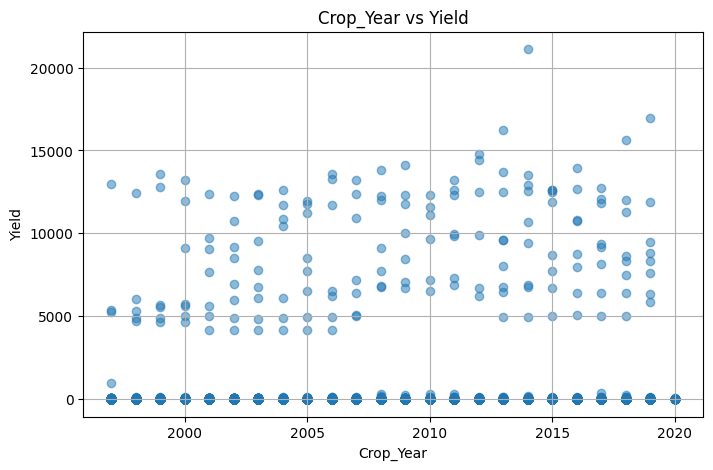

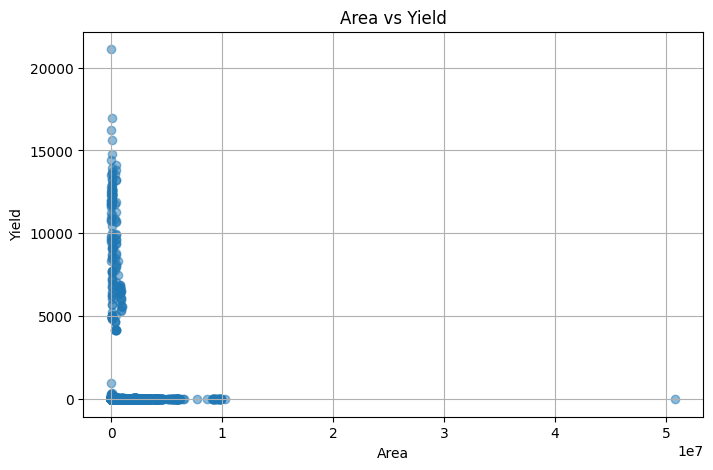

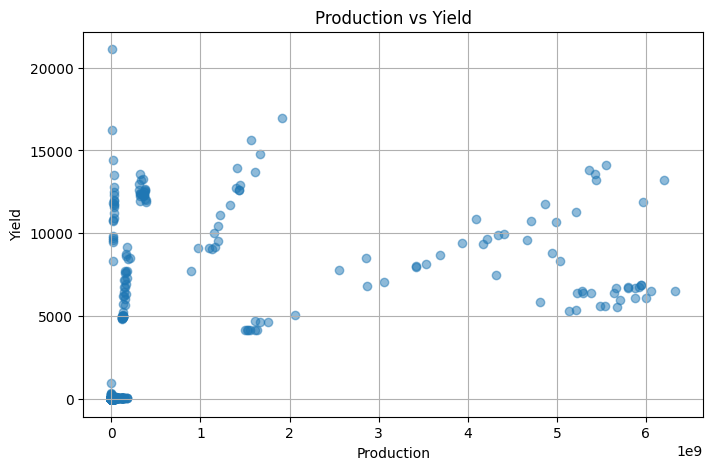

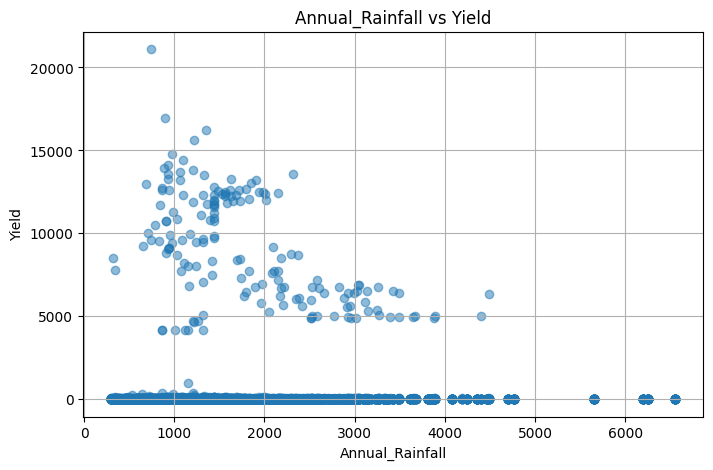

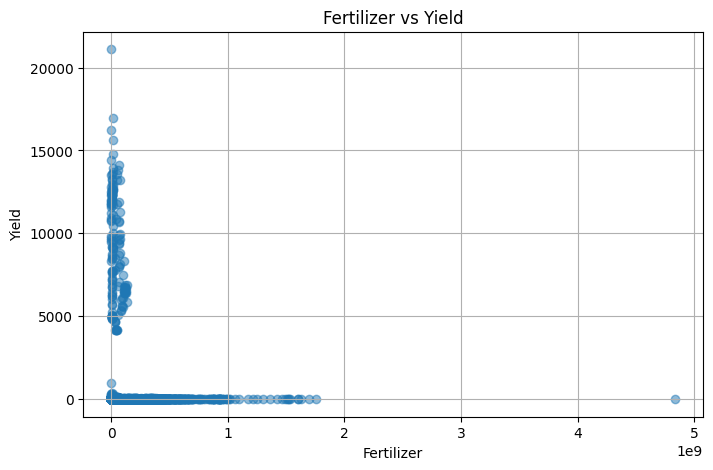

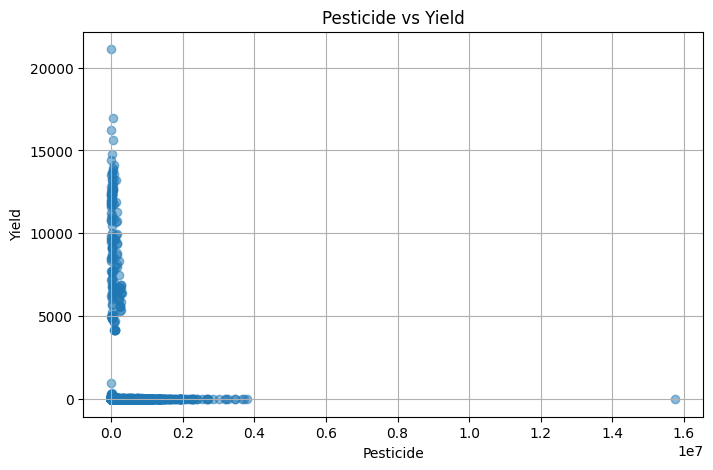

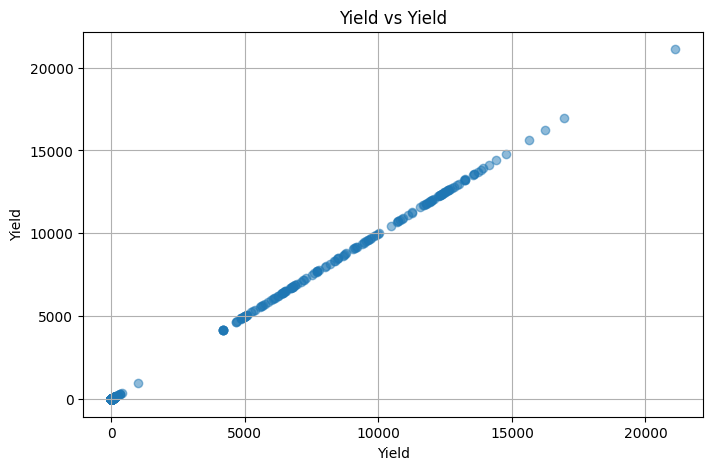

In [11]:
import matplotlib.pyplot as plt
for feature in numerical_feature:
    plt.figure(figsize=(8, 5))
    plt.scatter(data[feature], data['Yield'], alpha=0.5)
    plt.title(f'{feature} vs Yield')
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.grid(True)
    plt.show()

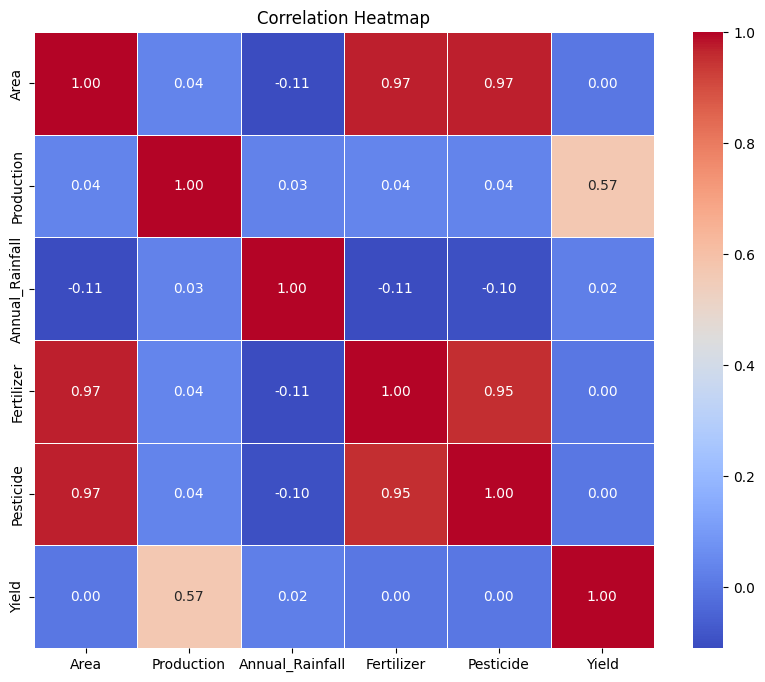

In [13]:
## using correlation Heatmap
import seaborn as sns
corr = data[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

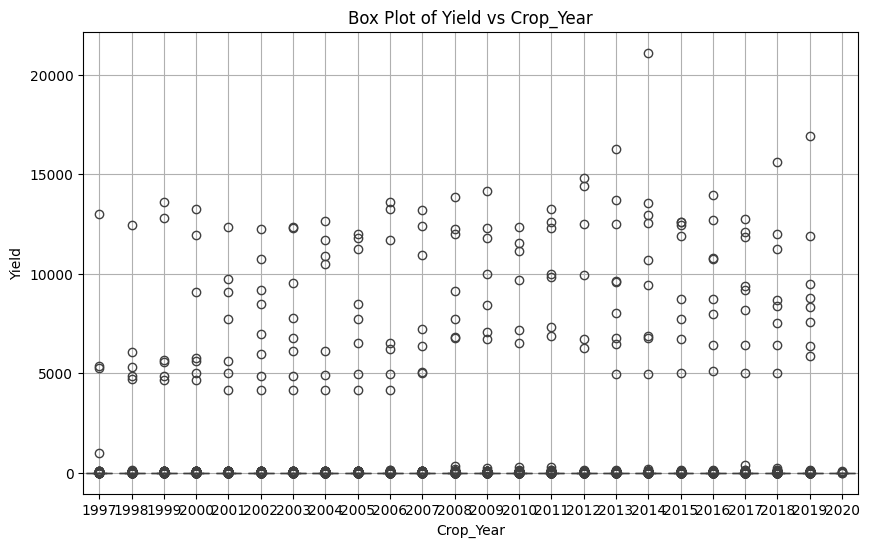

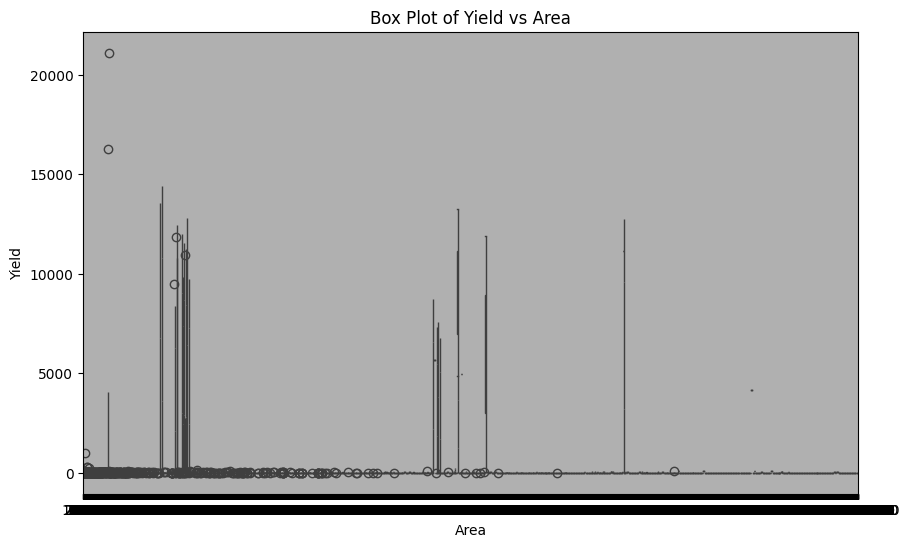

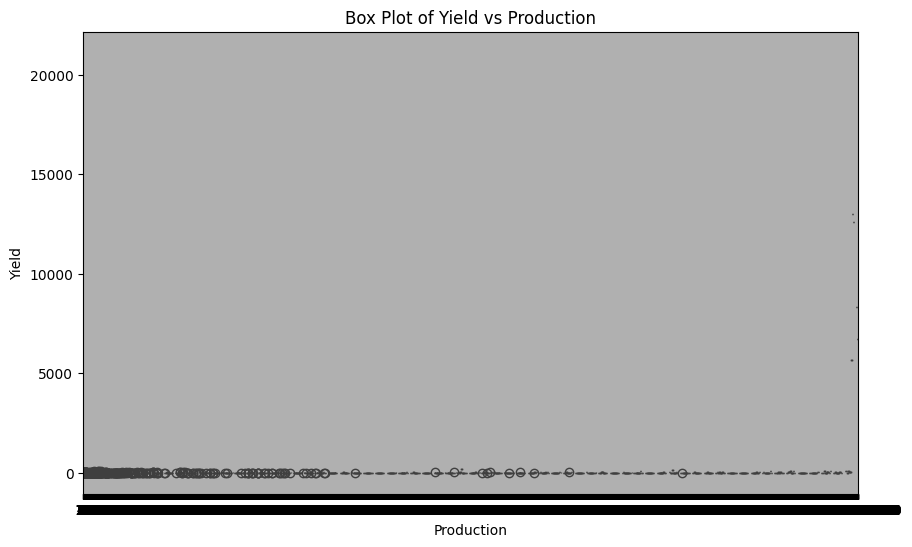

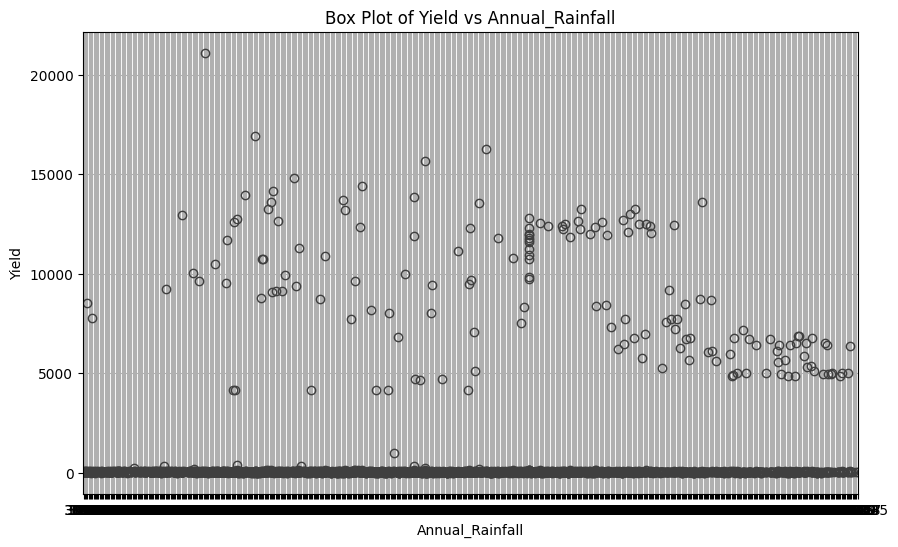

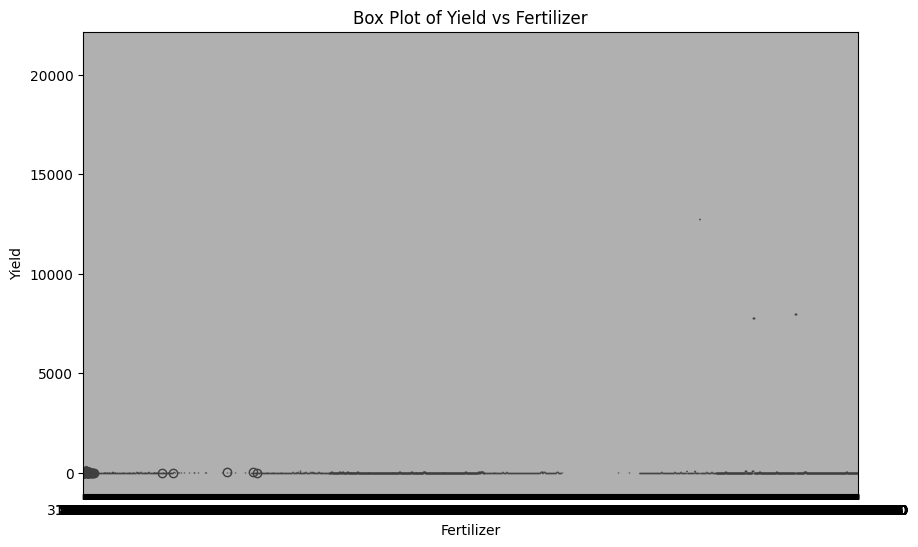

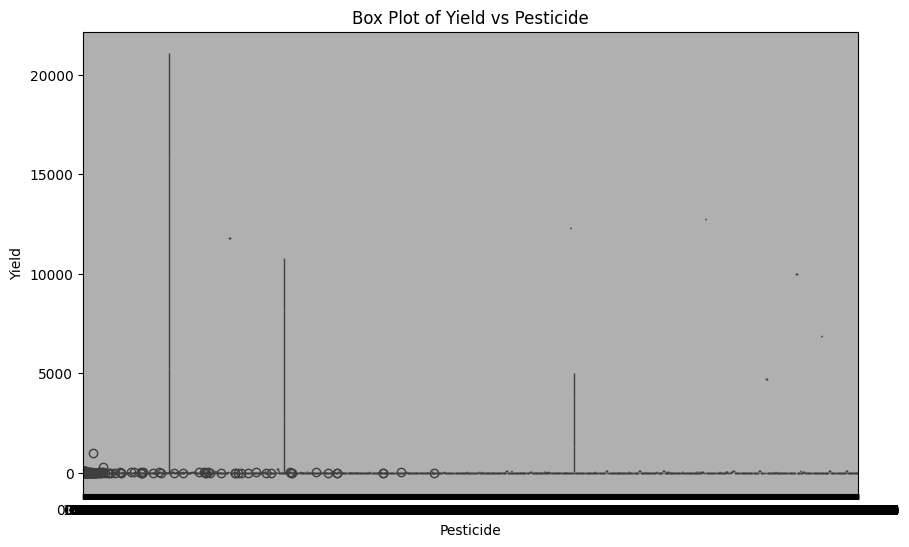

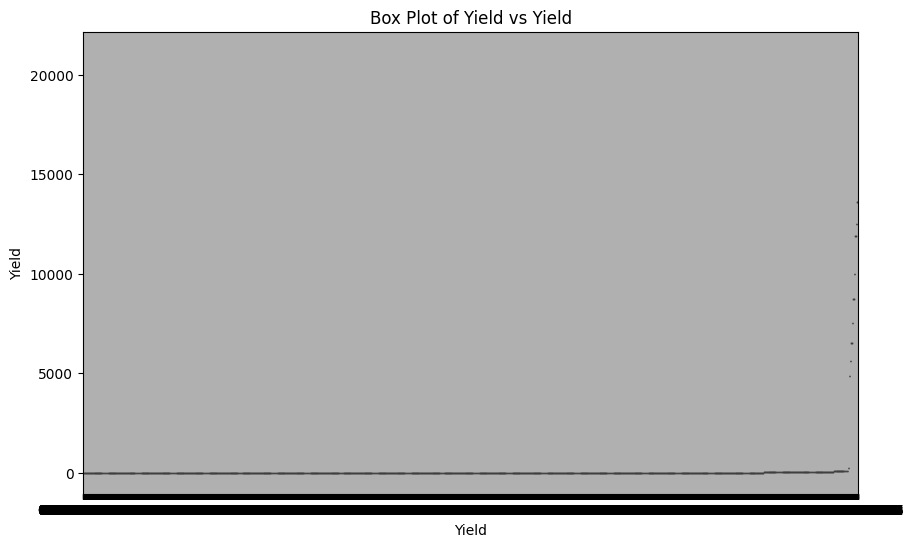

In [15]:
# box plot
for feature in numerical_feature:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature], y=data['Yield'])
    plt.title(f'Box Plot of Yield vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.grid(True)
    plt.show()

Conclusion: The production,area,fertilizer has the outliers which need to br handled.

We will convert the categorical feature using the one hot label encoder. and will use logistic regression to handle the yeild using the model selection.

Feature Enginerring

In [16]:
# first, replace the outliers with the median value, will make the function to identify the outliers using interquantile range and then replacing this



def replace_outliers(data,feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    median = data[feature].median()
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data.loc[(data[feature] < lower_bound) | (data[feature] > upper_bound), feature] = median
    return data


for feature in ['Production', 'Area', 'Fertilizer']:
    data = replace_outliers(data, feature)


print(data.describe())


          Crop_Year           Area     Production  Annual_Rainfall  \
count  19689.000000   19689.000000   19689.000000     19689.000000   
mean    2009.127584   21536.442299   30880.926304      1437.755177   
std        6.498099   36258.359109   55220.954807       816.909589   
min     1997.000000       0.500000       0.000000       301.300000   
25%     2004.000000    1390.000000    1393.000000       940.700000   
50%     2010.000000    9317.000000   13804.000000      1247.600000   
75%     2015.000000   19100.000000   25789.000000      1643.700000   
max     2020.000000  185670.000000  304516.000000      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.838407e+06  4.884835e+04     79.954009  
std    4.738213e+06  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    2.566898e+06

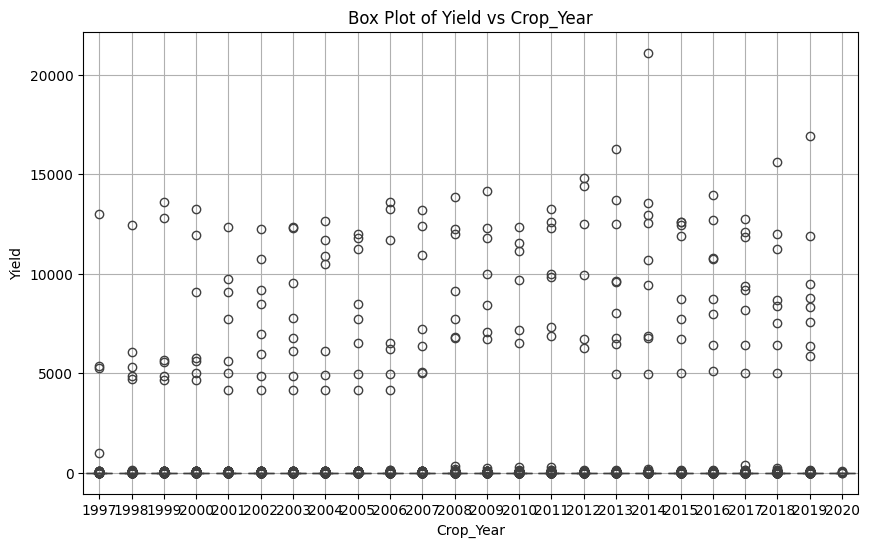

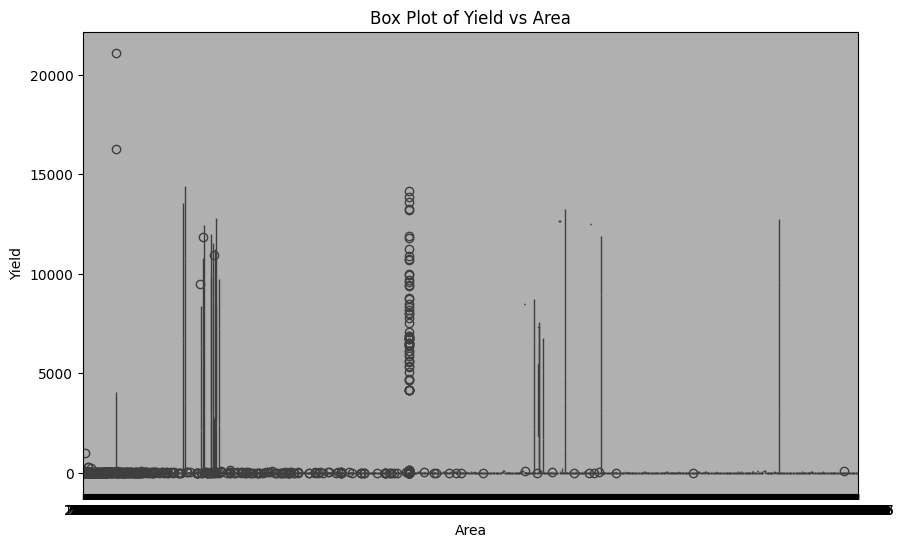

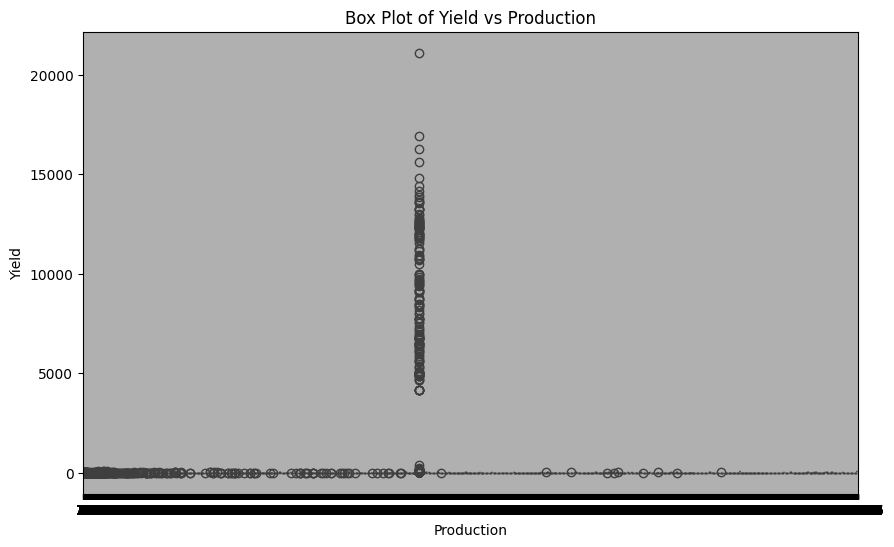

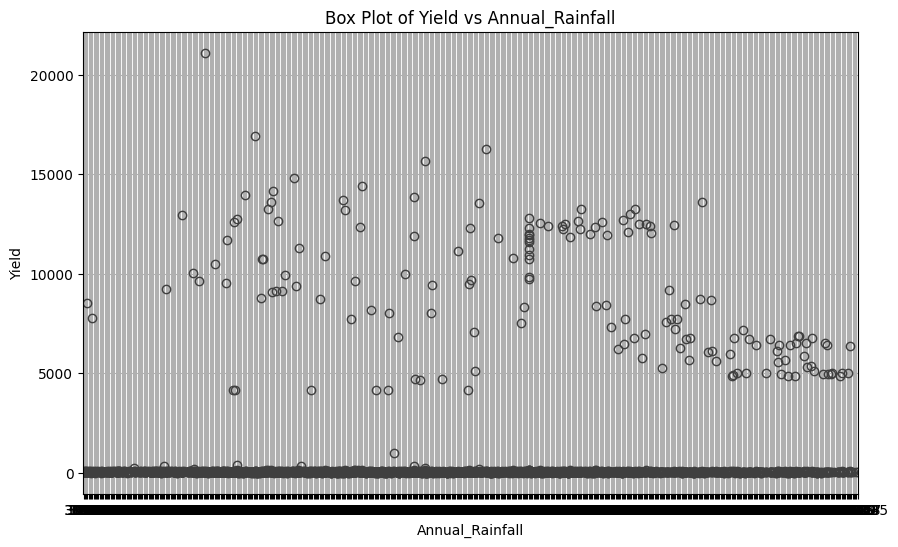

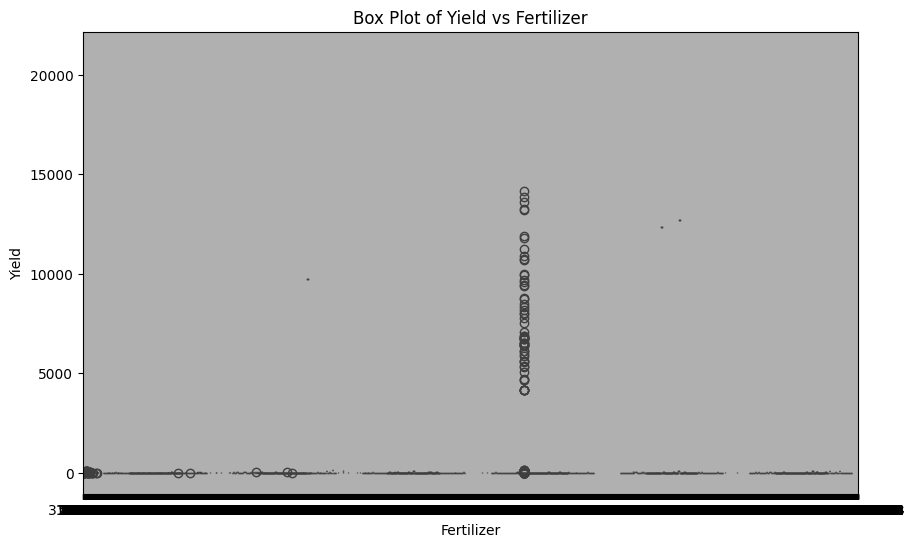

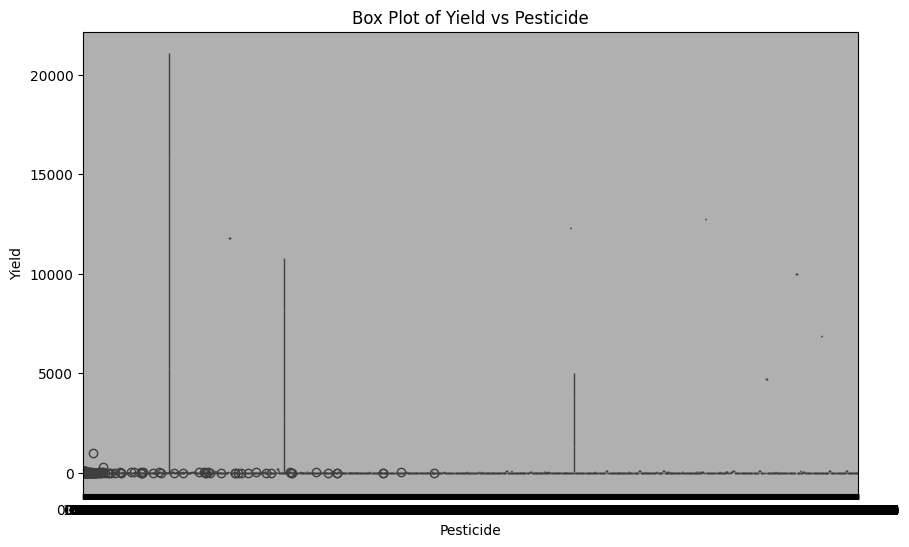

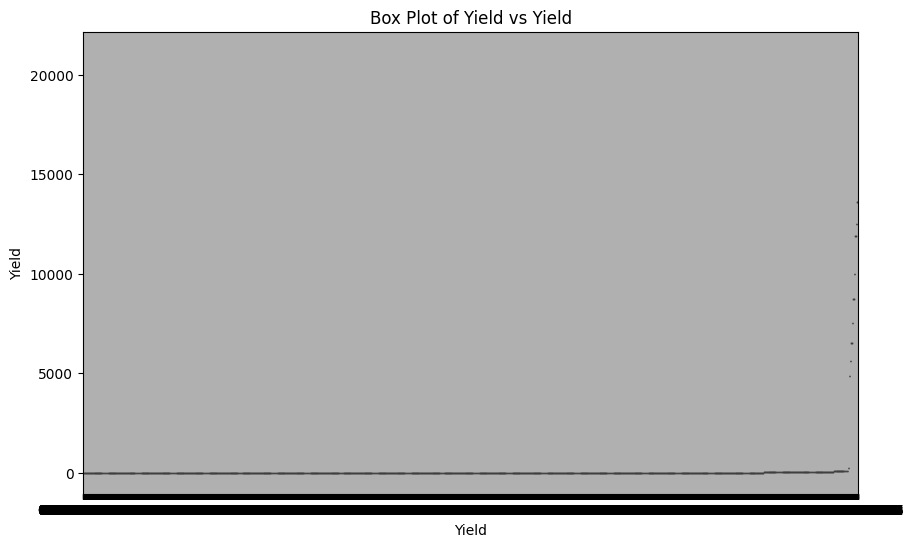

In [17]:
# checking with the box plot
# box plot
for feature in numerical_feature:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature], y=data['Yield'])
    plt.title(f'Box Plot of Yield vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.grid(True)
    plt.show()

In [25]:
# encoding the categorical feature using the one-hot label encoder
from sklearn.preprocessing import LabelEncoder

season_encoder = LabelEncoder()

data_encoded = pd.get_dummies(data, columns=['Crop', 'Season', 'State'])

data_encoded = data_encoded.astype(int)

data_combined = pd.concat([data, data_encoded], axis=1)

print(data_combined)



                Crop  Crop_Year       Season              State     Area  \
0           Arecanut       1997  Whole Year               Assam  73814.0   
1          Arhar/Tur       1997  Kharif                   Assam   6637.0   
2        Castor seed       1997  Kharif                   Assam    796.0   
3           Coconut        1997  Whole Year               Assam  19656.0   
4       Cotton(lint)       1997  Kharif                   Assam   1739.0   
...              ...        ...          ...                ...      ...   
19684  Small millets       1998  Kharif                Nagaland   4000.0   
19685          Wheat       1998  Rabi                  Nagaland   1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir   9317.0   
19687           Rice       1997  Kharif       Jammu and Kashmir   9317.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir   9317.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  ...  \
0      

In [26]:
data_combined.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,...,0,0,0,0,0,0,0,0,0,0
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,...,0,0,0,0,0,0,0,0,0,0
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,...,0,0,0,0,0,0,0,0,0,0
3,Coconut,1997,Whole Year,Assam,19656.0,13804,2051.4,1870661.52,6093.36,5238.051739,...,0,0,0,0,0,0,0,0,0,0
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,...,0,0,0,0,0,0,0,0,0,0


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def evaluate_models(data, target_column):
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Support Vector Regression': SVR()
    }
    
    results = {}
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[name] = {
            'Mean Squared Error': mse,
            'Mean Absolute Error': mae,
            'R-squared': r2
        }
    
    # Print results
    for name, metrics in results.items():
        print(f"Model: {name}")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")
        print()
    
    return results

# Example usage with your DataFrame
# Assuming 'data_encoded' is your DataFrame and 'Yield' is the target column
data_encoded = pd.get_dummies(data, columns=['Crop', 'Season', 'State'])
results = evaluate_models(data_encoded, 'Yield')


Model: Linear Regression
  Mean Squared Error: 151718.4946
  Mean Absolute Error: 65.1745
  R-squared: 0.8106

Model: Random Forest
  Mean Squared Error: 15894.2188
  Mean Absolute Error: 9.3501
  R-squared: 0.9802

Model: Gradient Boosting
  Mean Squared Error: 24256.9653
  Mean Absolute Error: 13.3303
  R-squared: 0.9697

Model: Support Vector Regression
  Mean Squared Error: 797273.7355
  Mean Absolute Error: 75.9898
  R-squared: 0.0049

